In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a dataset with some noise, 100 samples, 1 feature
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [4]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

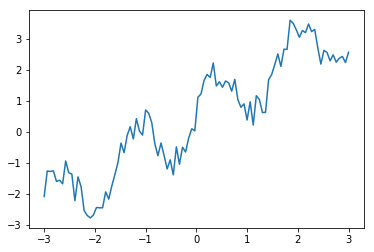

In [6]:
plt.plot(x,y)

In [7]:
'''
One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. 
One way to find such a line is LinearRegression (also known as ordinary least squares). 
The interface for LinearRegression is exactly the same as for the classifiers before, only that y now contains float values, 
instead of classes.

To apply a scikit-learn model, we need to make X be a 2d-array:
'''

print(x.shape)
X = x[:, np.newaxis]
print(X.shape)


(100,)
(100, 1)


In [9]:
#We split our data in a training and a test set again:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
#Then we can built our regression model:

#import the class
from sklearn.linear_model import LinearRegression

#instantiate the model
regressor = LinearRegression()

#and fit it to our training data
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#use the predict function 
y_pred_train = regressor.predict(X_train)

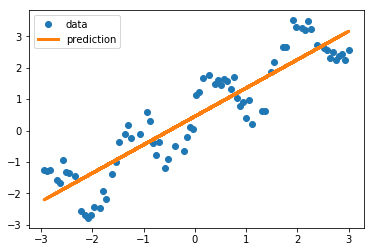

In [14]:
#let's plot this to see what it did
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, linewidth=3, label="prediction")
plt.legend(loc='best')

#so, the line is able to capture the general slope, but not a lot of details

In [15]:
#let's try the test set

y_pred_test = regressor.predict(X_test)

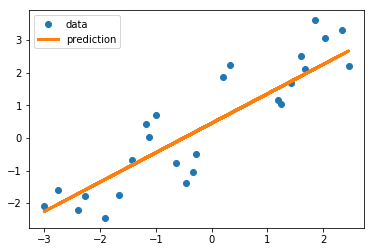

In [17]:
#visualize what happened:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, linewidth=3, label="prediction")
plt.legend(loc='best')

In [19]:
'''
Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the score method. 
For regression tasks, this is the R2 score. Another popular way would be the mean squared error.
'''

regressor.score(X_test, y_test)

0.79943214050796851

# KNeighborsRegression
- As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [20]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

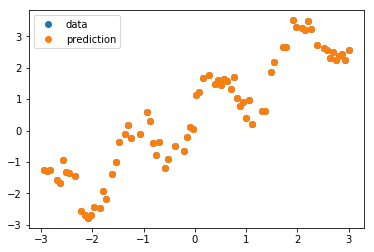

In [21]:
#let's look at the behavior on the training and test data set

y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

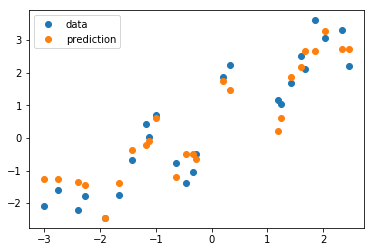

In [25]:
#On the training set, we do a perfect job: each point is its own nearest neighbor!, 
#but obviously we remembered the training set...

y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

In [23]:
#On the test set, we also do a better job of capturing the variation, but our estimates 
#look much more messy then before. Let us look at the R2 score:

kneighbor_regression.score(X_test, y_test)

0.91662930224679484